In [77]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import matplotlib.patches as mpatches
%matplotlib inline

In [160]:
temp_data = pd.read_csv("./SC-Min-temp.csv")
precp_data = pd.read_csv("./South Carolina County 24-Hour Precipitation Records.csv")

In [158]:
temp_data.head()

,County,Location,Temperature (F),Date,numericTimestamp
17,Dorchester,Summerville,-5,Jan-12-1899,-2.239556e+09
43,Union,Santuck,-11,Feb-14-1899,-2.236705e+09
19,Fairfield,Winnsboro,-3,Feb-14-1899,-2.236705e+09
31,Lexington,Batesburg,-4,Feb-14-1899,-2.236705e+09
5,Barnwell,Blackville 3W,-3,Feb-14-1899,-2.236705e+09


In [162]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   County           46 non-null     object
 1   Location         46 non-null     object
 2   Temperature (F)  46 non-null     int64 
 3   Date             46 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [161]:
precp_data.head()

,County,Location,Precipitation (inches),Date
0,Abbeville,Calhoun Falls,7.80,"Jul. 17, 1991"
1,Aiken,Aiken 4SE,9.68,"Apr. 16, 1969"
2,Allendale,Allendale 2NW,8.00,"Jun. 27, 1993"
3,Anderson,Pelzer,12.81,"Aug. 27, 1995"
4,Bamberg,Branchville,8.45,"Oct. 11, 1990"


In [163]:
precp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   County                  46 non-null     object 
 1   Location                46 non-null     object 
 2   Precipitation (inches)  46 non-null     float64
 3   Date                    46 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.6+ KB


In [98]:
date = temp_data.Date
date = [i.replace(".",",").split(", ") for i in date]
temp_data['Date'] = ["-".join(i) for i in date]
month_dict= {"Jan":'01', "Feb":'02', "Mar":'03', "Apr":'04',"May":'05', "June":'06',"July":'07',"Aug":'08',"Sep":'09',"Oct":'10',"Nov":'11',"Dec":'12'}
numericTS = [dt.timestamp(dt.strptime(month_dict[i[0]]+"/"+i[1]+"/"+i[2], "%m/%d/%Y")) for i in date] 

In [99]:
temp_data['numericTimestamp'] = numericTS
temp_data = temp_data.sort_values(by=['numericTimestamp'])

Text(0, 0.5, 'Temperature (F)')

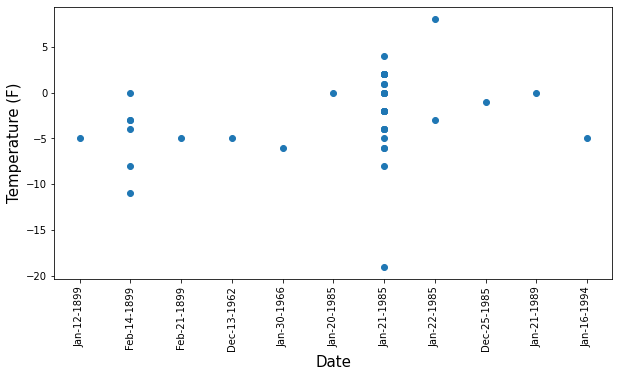

In [100]:
plt.figure(figsize=(10,5)) #not considering location details
plt.xticks(rotation = 90)
x = temp_data['Date'].values.tolist()
y = temp_data['Temperature (F)'].values.tolist()
plt.plot(x,y,'o')
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Temperature (F)", fontsize=15)

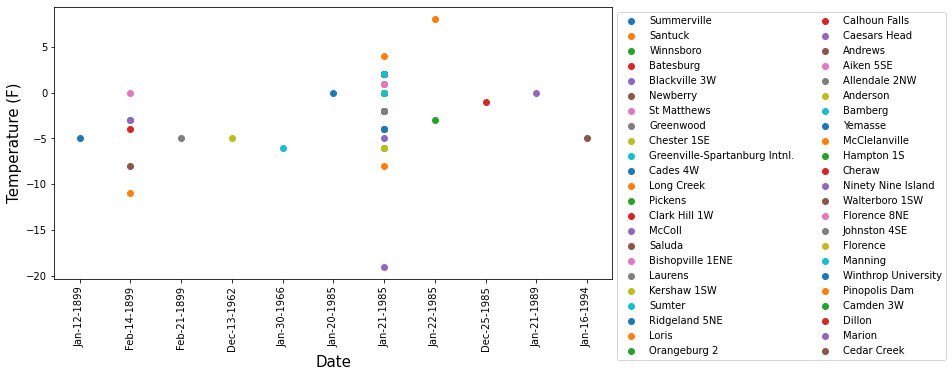

In [138]:
plt.figure(figsize=(10,5)) #considering location details
plt.xticks(rotation = 90)
temp = temp_data['Temperature (F)'].values.tolist()
loc = temp_data['Location'].values.tolist()
date = temp_data['Date'].values.tolist()
for y,l,x in zip(temp,loc, date):
    plt.plot(x, y, 'o', label=l)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Temperature (F)", fontsize=15)
plt.legend(loc='upper left', ncol=2, fontsize=10, bbox_to_anchor=(1, 1))

In [102]:
date = precp_data.Date
date = [i.replace(".",",").split(", ") for i in date]
precp_data['Date'] = ["-".join(i) for i in date]
month_dict= {"Jan":'01', "Feb":'02', "Mar":'03', "Apr":'04',"May":'05', "Jun":'06',"Jul":'07',"Aug":'08',"Sep":'09',"Oct":'10',"Nov":'11',"Dec":'12'}
numericTS = [dt.timestamp(dt.strptime(month_dict[i[0].replace("Jui","Jul")]+"/"+i[1]+"/"+i[2], "%m/%d/%Y")) for i in date] 

In [103]:
precp_data['numericTimestamp'] = numericTS
precp_data = precp_data.sort_values(by=['numericTimestamp'])

Text(0, 0.5, 'Precipitation (inches)')

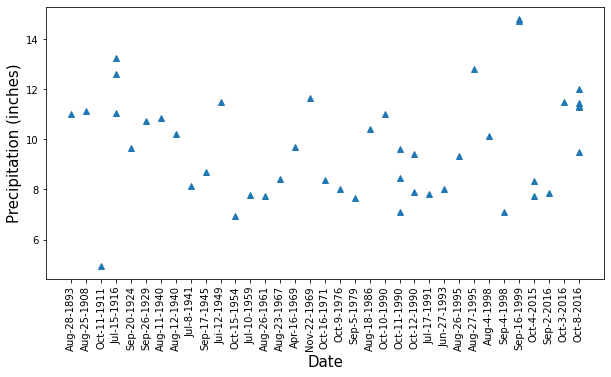

In [104]:
plt.figure(figsize=(10,5))#not considering location detials
plt.xticks(rotation = 90)
x = precp_data['Date'].values.tolist()
y = precp_data['Precipitation (inches)'].values.tolist()
plt.plot(x,y,'^')
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Precipitation (inches)", fontsize=15)

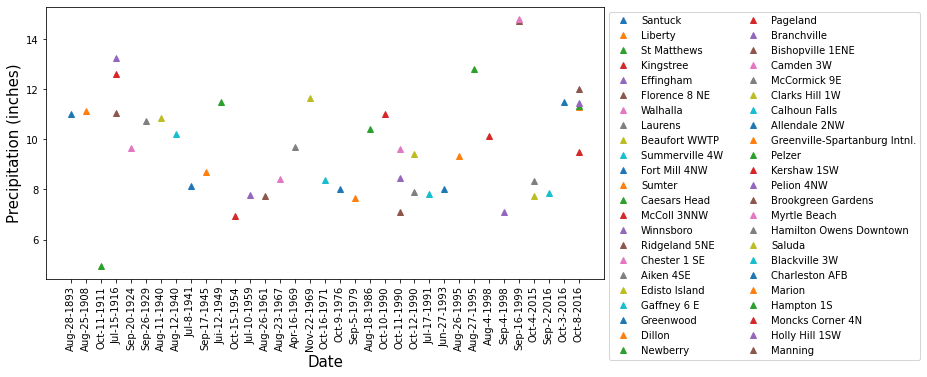

In [137]:
plt.figure(figsize=(10,5)) #considering location details
plt.xticks(rotation = 90)
precp = precp_data['Precipitation (inches)'].values.tolist()
loc = precp_data['Location'].values.tolist()
date = precp_data['Date'].values.tolist()
for y,l,x in zip(precp,loc, date):
    plt.plot(x, y, '^', label=l)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Precipitation (inches)", fontsize=15)
plt.legend(loc='upper left', ncol=2, fontsize=10, bbox_to_anchor=(1, 1))

In [107]:
def datafromboth(df1, df2, col):
    temp1 = df1[col].values.tolist()
    temp2 = df2[col].values.tolist()
    return temp1+temp2

In [109]:
bothdate = datafromboth(temp_data, precp_data, 'Date')
bothyear = [i.split("-")[2] for i in bothdate]
bothlocation = datafromboth(temp_data, precp_data, 'Location')
bothnTS = datafromboth(temp_data, precp_data, 'numericTimestamp')

In [164]:
print(len(bothlocation), len(set(bothlocation)))

92 71


In [111]:
both_data = pd.DataFrame(data = None, columns = ['BDate',"Precp", "Temp","BL", "PL", "TL", "BnTS", "BYear"])
both_data['BnTS'] = bothnTS
both_data['BDate'] = bothdate
both_data['BL'] = bothlocation
both_data['TL'] = bothlocation[:46] + [float("NaN") for i in range(46)]
both_data['PL'] = [float("NaN") for i in range(46)] + bothlocation[46:]
both_data['BYear'] = bothyear

In [112]:
def specificvaluelist(df1, df2, col):
    date = df1['Date'].values.tolist()
    location = df1['Location'].values.tolist()
    domain_values = df1[col].values.tolist()
    dateLoc_dict = {dt+loc:val for dt, loc, val in zip(date, location ,domain_values)}
    return_values = list()
    bdate = both_data['BDate'].values.tolist()
    blocation = both_data['BL'].values.tolist()
    for dt, loc in zip(bdate, blocation):
        if(dt+loc in dateLoc_dict.keys()):
            return_values.append(dateLoc_dict[dt+loc])
        else:
            return_values.append(float("NaN"))
    return return_values

In [113]:
both_data['Temp'] = specificvaluelist(temp_data, both_data, 'Temperature (F)')
both_data['Precp'] = specificvaluelist(precp_data, both_data, 'Precipitation (inches)')

In [115]:
both_data = both_data.sort_values(by=['BnTS'])

Text(0.5, 0, 'Date')

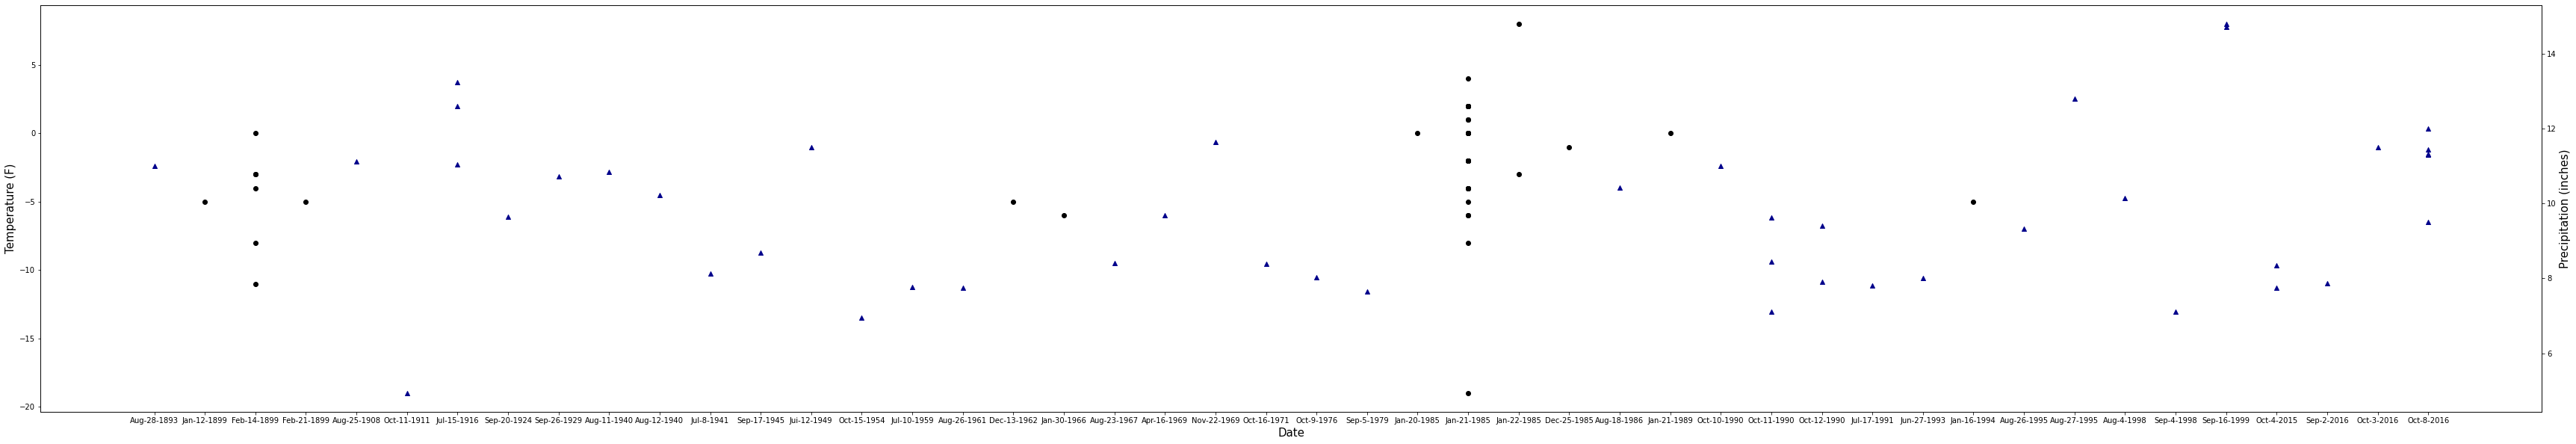

In [154]:
fig, ax1 = plt.subplots(figsize = (60,10)) #Answer 1 Task 3 (b)
ax2 = ax1.twinx()
bdate = both_data['BDate'].values.tolist()
temp_values = both_data['Temp'].values.tolist()
precp_values = both_data['Precp'].values.tolist()
ax1.scatter(bdate,temp_values, marker='o', c='#000000')
ax2.scatter(bdate,precp_values, marker='^', c='#00008B')
ax1.set_ylabel('Temperature (F)', fontsize=15)
ax2.set_ylabel('Precipitation (inches)', fontsize=15)
ax1.set_xlabel('Date', fontsize = 15)

In [128]:
color_bar = list()
for i in range(len(final2)):
    color_bar.append('#%06X' % randint(0x152DFF, 0xFFFFFF))

In [129]:
len(color_bar), len(set(color_bar))

(92, 92)

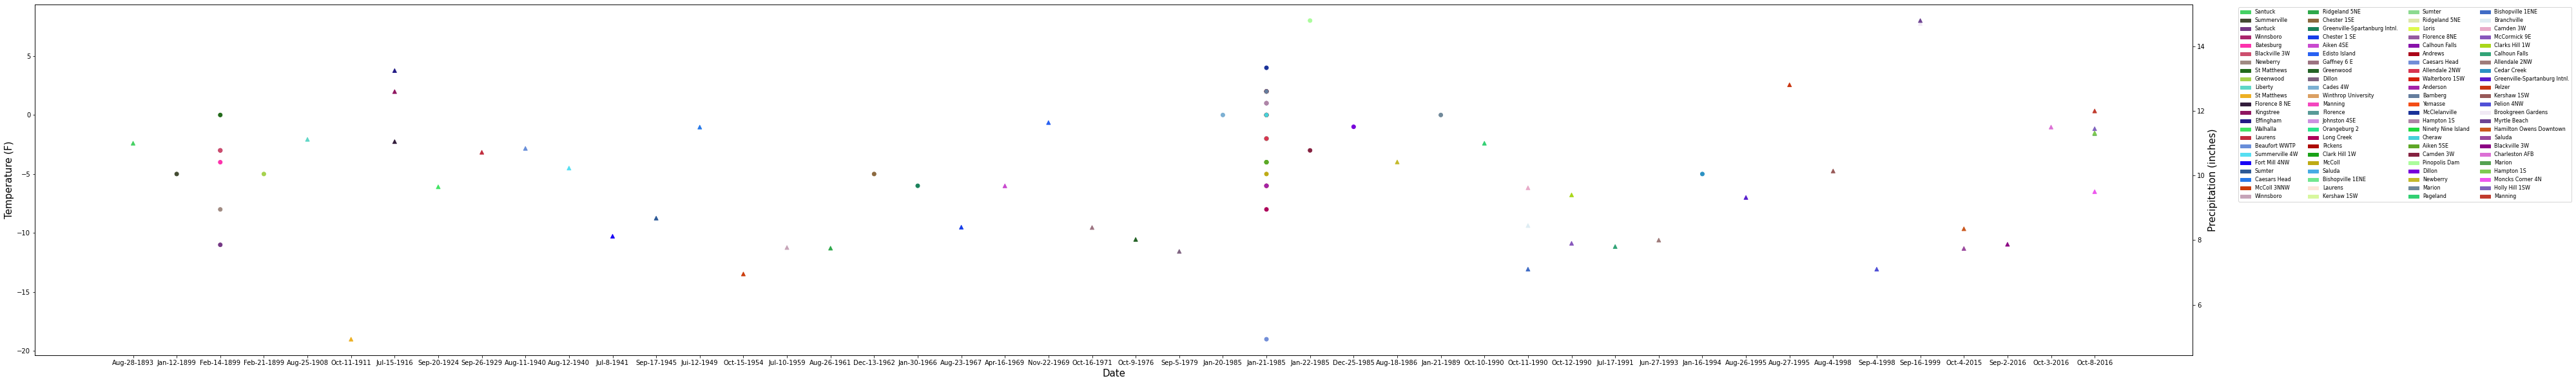

In [157]:
fig, ax1 = plt.subplots(figsize = (60,10)) #Answer 1 Task 3 (a)
ax2 = ax1.twinx()
bdate = both_data['BDate'].values.tolist()
temp_values = both_data['Temp'].values.tolist()
precp_values = both_data['Precp'].values.tolist()
loc_P = both_data['PL'].values.tolist()
loc_T = both_data['TL'].values.tolist()
ax1.scatter(bdate,temp_values, marker='o', c=color_bar, label = loc_T)
ax2.scatter(bdate,precp_values, marker='^', c=color_bar, label = loc_P)
ax1.set_ylabel('Temperature (F)', fontsize=15)
ax2.set_ylabel('Precipitation (inches)', fontsize=15)
ax1.set_xlabel('Date', fontsize = 15)
legend  =list()
bloc = both_data['BL'].values.tolist()
for color, loc in zip(color_bar, bloc):
    legend.append(mpatches.Patch(color=color, label=loc))
plt.legend(handles=legend,loc='upper left', ncol=4, fontsize=8, bbox_to_anchor=(1.02, 1))